# Methods of Signal Visualization 

In [2]:
try:
    from scipy import signal
except:
    !pip3 install scipy
    from scipy import signal

from scipy.signal import chirp, spectrogram
from scipy.fftpack import fft, ifft
from scipy.io.wavfile import write 

import numpy as np

try:
    import matplotlib.pyplot as plt
except:
    !pip3 install matplotlib
    import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16})

try:
    import IPython.display as ipd
except:
    !pip3 install IPython 
    import IPython.display as ipd
    
def caption(txt):
    fig.text(.5, -.1, txt, ha='center')

In [3]:
fs = 10000 # sample rate
tf = 1 # final time
t = np.linspace(0,tf,int(tf*fs)) # time signal for plotting
NFFT = 2**(int(np.log2(len(t)))) # lowest power of 2 for FFT alg
freq = fs*np.arange(0,1,1/NFFT) # frequency vector for plotting

## Time Domain/Sound Signal Visualization 

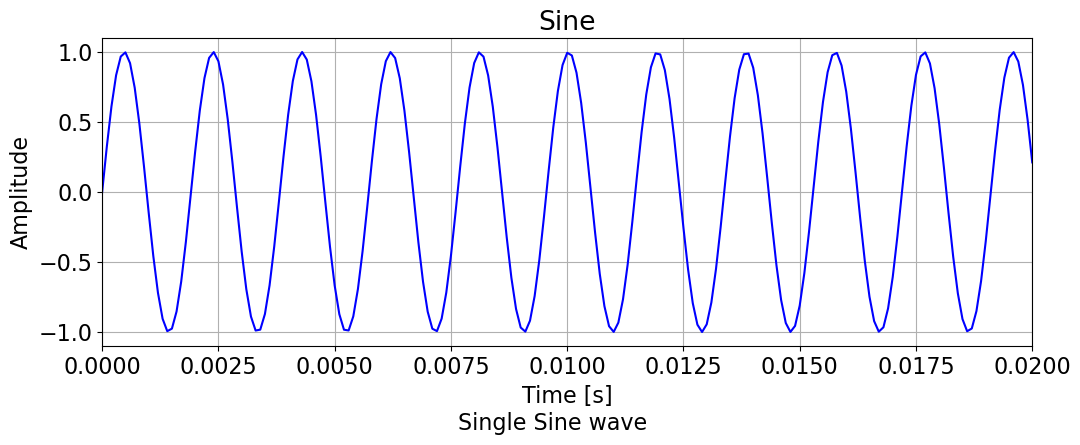

In [4]:
# Sine
f0 = 523.25 # C5

phi0 = 2*np.pi*f0*t
y0 = np.sin(phi0);

fig = plt.figure(figsize=(12,4))
plt.plot(t,y0,'b-')
plt.xlim([0,0.02])
plt.title('Sine')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
caption('Single Sine wave')
plt.show()

In [6]:
write("y0.wav", fs, y0.astype(np.float32))
ipd.Audio('y0.wav', rate = fs) # 

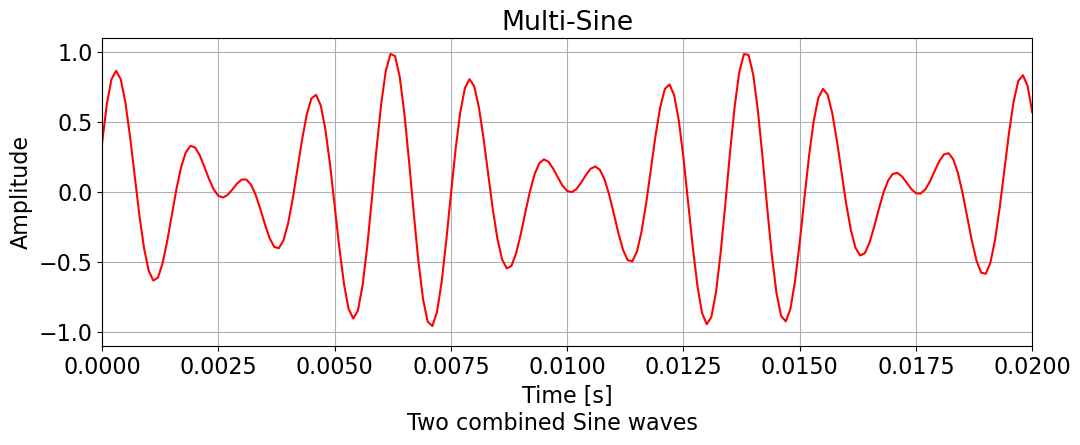

In [8]:
# multisine
f1 = 659.25 # E5
offset = np.pi/4
phi1 = 2*np.pi*f1*t + offset

y01 = y0 + np.sin(phi1);
y01 = y01/np.max(y01); # normalize


fig = plt.figure(figsize=(12,4))
plt.plot(t,y01,'r-')
plt.xlim([0,0.02])
plt.title('Multi-Sine')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
caption('Two combined Sine waves')
plt.show()

write("y01.wav", fs, y01.astype(np.float32))
ipd.Audio('y01.wav', rate=fs) # 

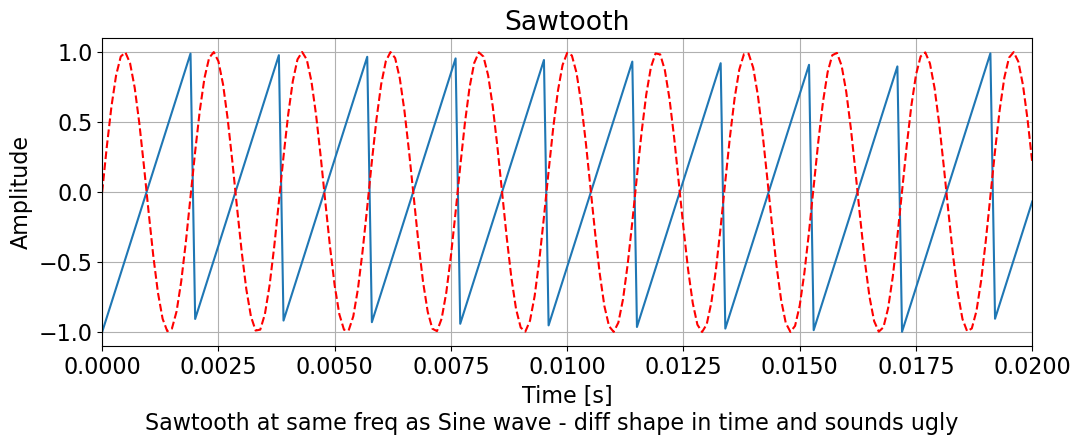

In [10]:
# Sawtooth
ys1 = signal.sawtooth(phi0);

fig = plt.figure(figsize=(12,4))
plt.plot(t,ys1)
plt.plot(t,y0,'r--')
plt.xlim([0,0.02])
plt.title('Sawtooth')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
caption('Sawtooth at same freq as Sine wave - diff shape in time and sounds ugly')
plt.show()

write("ys1.wav", fs, ys1.astype(np.float32))
ipd.Audio('ys1.wav', rate=fs) # 

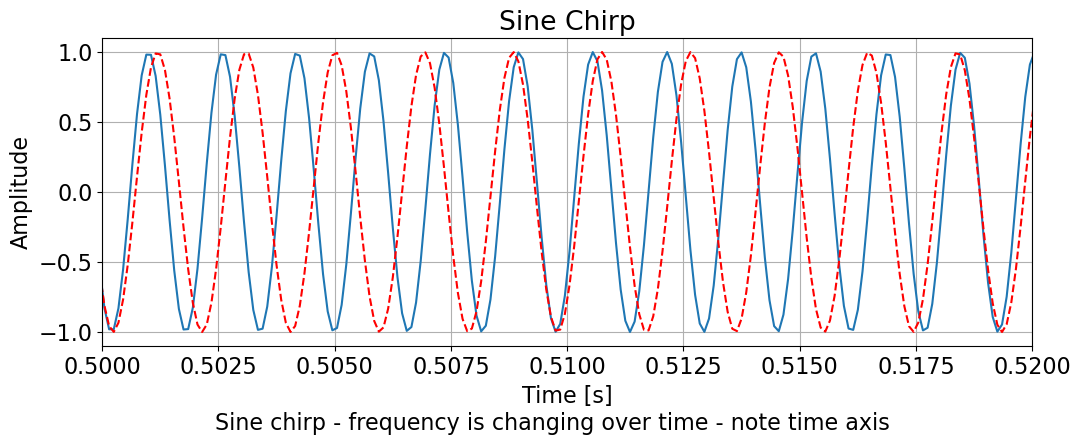

In [13]:
# Sine chirp - frequency changes with time
beta = (f1 - f0) / tf**2
# for a chirp the frequency changes with time
fchirp = lambda t: f0 + beta * t**2

phi2 = 2*np.pi*(fchirp(t) * t)
y2 = np.sin(phi2);

fig = plt.figure(figsize=(12,4))
plt.plot(t,y2)
plt.plot(t,y0,'r--')
plt.xlim([tf/2,tf/2+0.02])
plt.title('Sine Chirp')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
caption('Sine chirp - frequency is changing over time - note time axis')
plt.show()

write("y2.wav", fs, y2.astype(np.float32))
ipd.Audio('y2.wav', rate=fs) # 

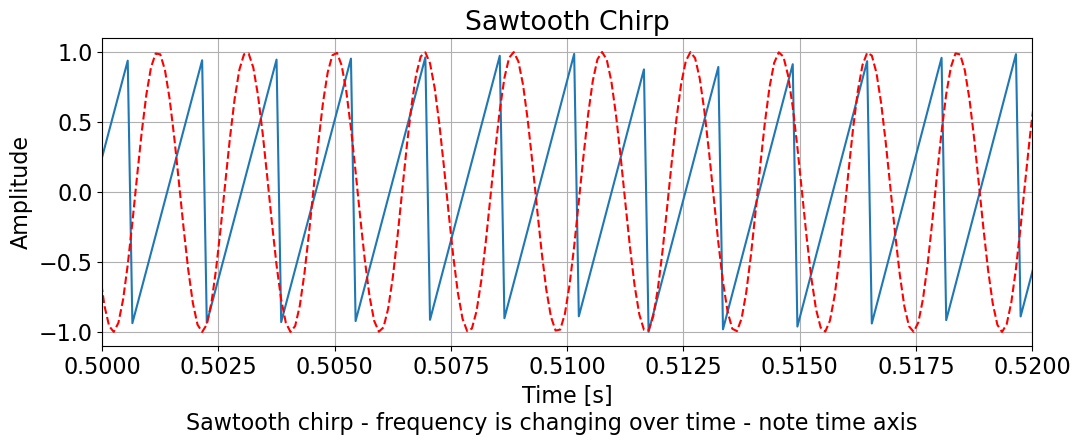

In [14]:
# Sawtooth chirp
beta = (f1 - f0) / tf**2
# for a chirp the frequency changes with time
fchirp = lambda t: f0 + beta * t**2

phi2 = 2*np.pi*(fchirp(t) * t)
ys2 = signal.sawtooth(phi2);

fig = plt.figure(figsize=(12,4))
plt.plot(t,ys2)
plt.plot(t,y0,'r--')
plt.xlim([tf/2,tf/2+0.02])
plt.title('Sawtooth Chirp')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
caption('Sawtooth chirp - frequency is changing over time - note time axis')
plt.show()

write("ys2.wav", fs, ys2.astype(np.float32))
ipd.Audio('ys2.wav', rate=fs) # 

## Frequency Domain Signal Visualization 

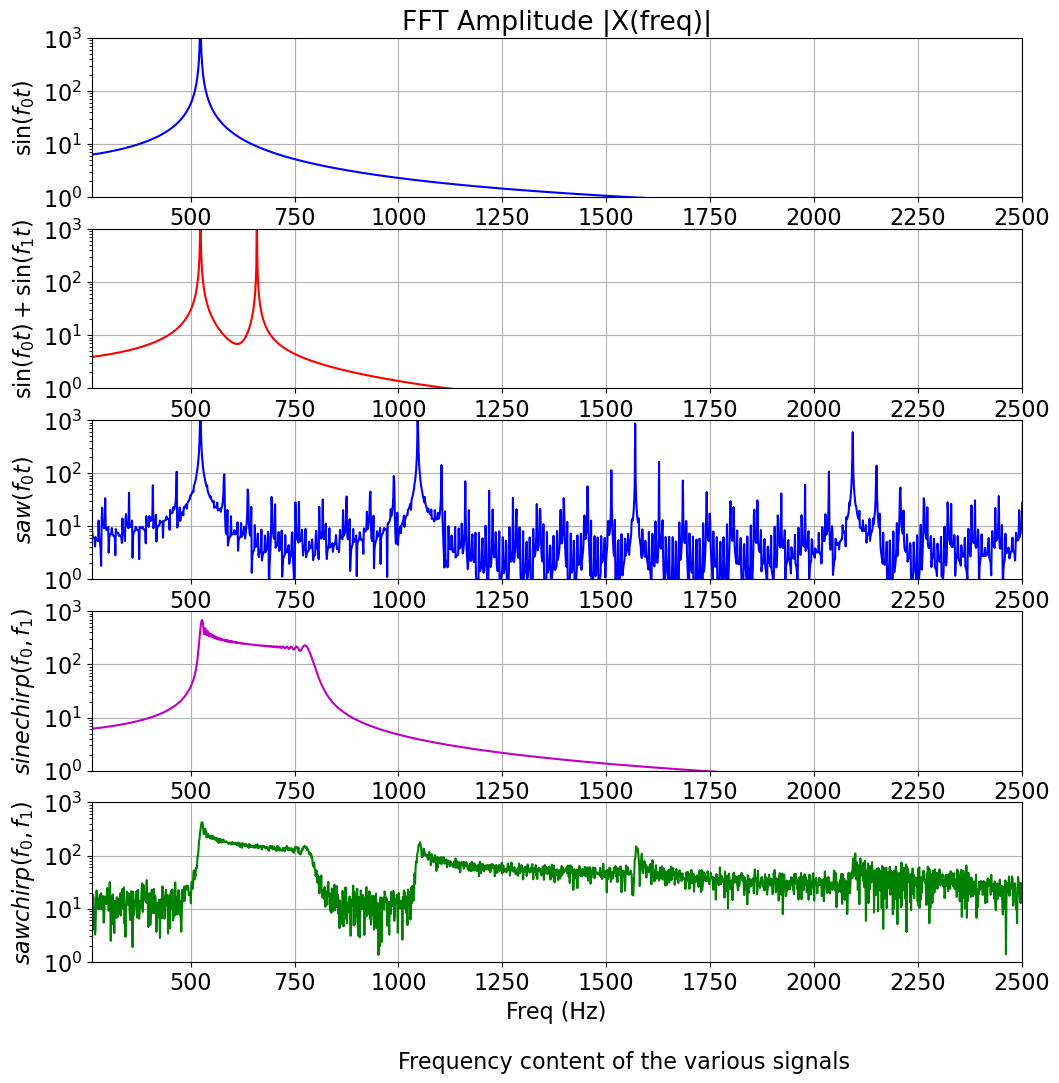

In [9]:
fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot(511)
X = fft(y0[:NFFT])
ax1.semilogy(freq, np.abs(X), 'b')
ax1.set_ylabel('$\sin(f_0 t)$')
ax1.set_title('FFT Amplitude |X(freq)|')
ax1.grid()
ax1.set_ylim(1, 1000)
ax1.set_xlim(f0/2, fs/4)

ax2 = plt.subplot(512,sharex=ax1,sharey=ax1)
X = fft(y01[:NFFT])
ax2.semilogy(freq, np.abs(X), 'r')
ax2.set_ylabel('$\sin(f_0 t)+\sin(f_1 t)$')
ax2.grid()

ax3 = plt.subplot(513,sharex=ax1,sharey=ax1)
X = fft(ys1[:NFFT])
ax3.semilogy(freq, np.abs(X), 'b')
ax3.set_ylabel('$saw(f_0 t)$')
ax3.grid()

ax22 = plt.subplot(514,sharex=ax1,sharey=ax1)
X = fft(y2[:NFFT])
ax22.semilogy(freq, np.abs(X), 'm')
ax22.set_ylabel('$sinechirp(f_0,f_1)$')
ax22.grid()

ax4 = plt.subplot(515,sharex=ax1,sharey=ax1)
X = fft(ys2[:NFFT])
ax4.semilogy(freq, np.abs(X), 'g-')
ax4.set_ylabel('$sawchirp(f_0,f_1)$')
ax4.grid()
ax4.set_xlabel('Freq (Hz)')
plt.text(fs/10,0.01,'Frequency content of the various signals')
plt.show()

## Frequency/Time Signal Visualization - Signal Variations

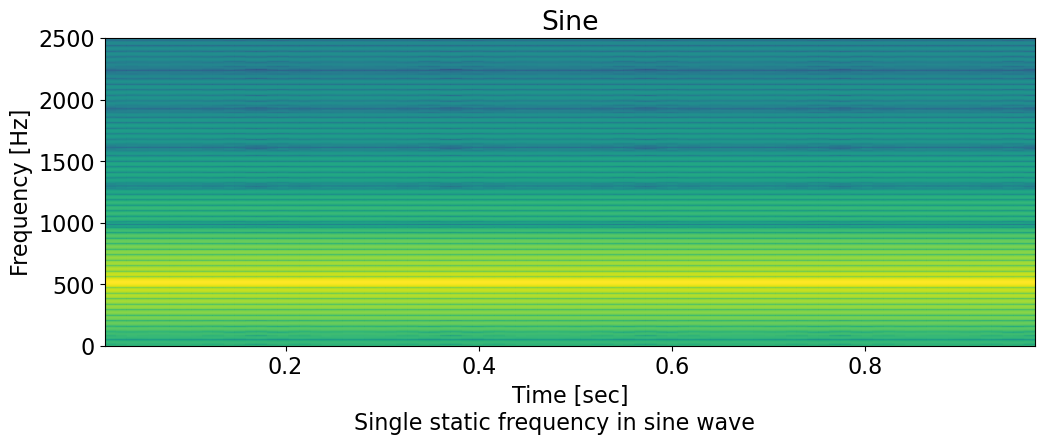

In [10]:
ff0, tt0, Sxx0 = signal.spectrogram(y0, fs, detrend=False, nfft = NFFT)
ff01, tt01, Sxx01 = signal.spectrogram(y01, fs, detrend=False, nfft = NFFT)
ff2, tt2, Sxx2 = signal.spectrogram(y2, fs, detrend=False, nfft = NFFT)

fig = plt.figure(figsize=(12,4))
plt.pcolormesh(tt0, ff0, np.log10(Sxx0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Sine')
plt.ylim([0,fs/4])
caption('Single static frequency in sine wave')
plt.show()

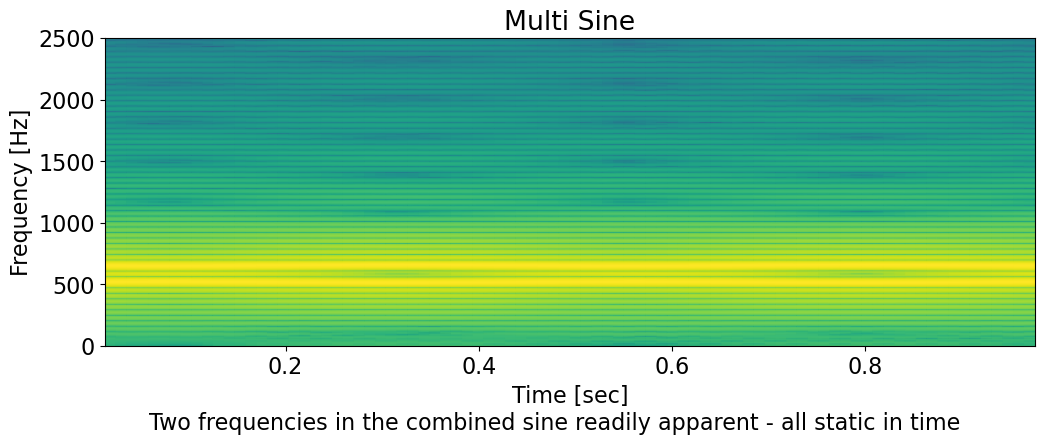

In [11]:
fig = plt.figure(figsize=(12,4))
plt.pcolormesh(tt01, ff01, np.log10(Sxx01), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Multi Sine')
plt.ylim([0,fs/4])
caption('Two frequencies in the combined sine readily apparent - all static in time')
plt.show()

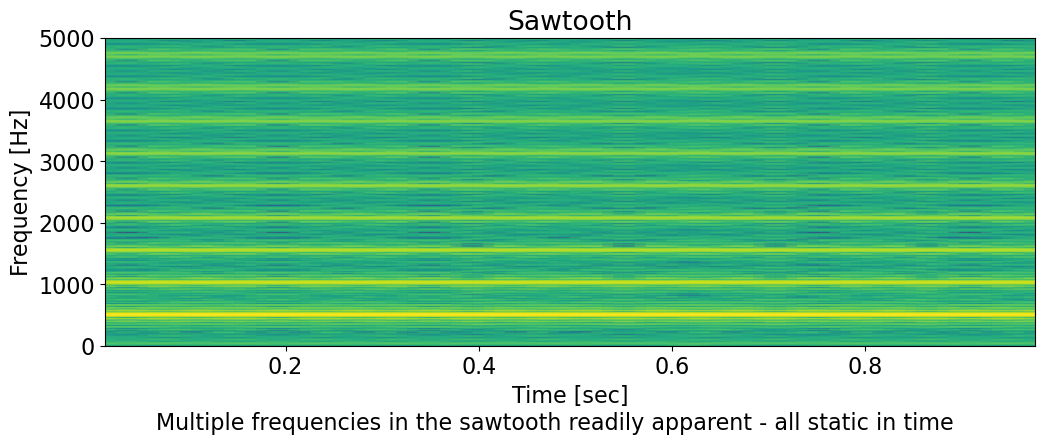

In [12]:
ffs1, tts1, Sxxs1 = signal.spectrogram(ys1, fs, detrend=False, nfft = NFFT)

fig = plt.figure(figsize=(12,4))
plt.pcolormesh(tts1, ffs1, np.log10(Sxxs1), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Sawtooth')
plt.ylim([0,fs/2])
caption('Multiple frequencies in the sawtooth readily apparent - all static in time')
plt.show()

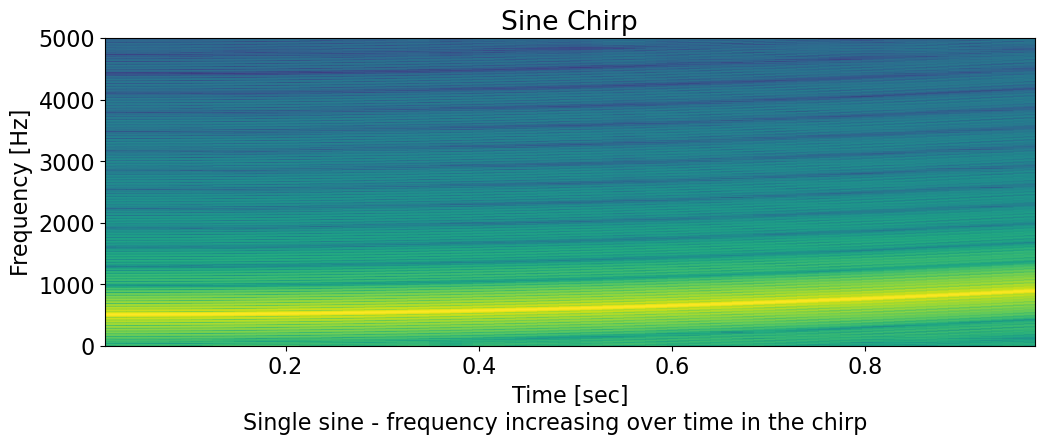

In [13]:
fig = plt.figure(figsize=(12,4))
plt.pcolormesh(tt2, ff2, np.log10(Sxx2), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Sine Chirp')
plt.ylim([0, fs/2])
caption('Single sine - frequency increasing over time in the chirp')
plt.show()

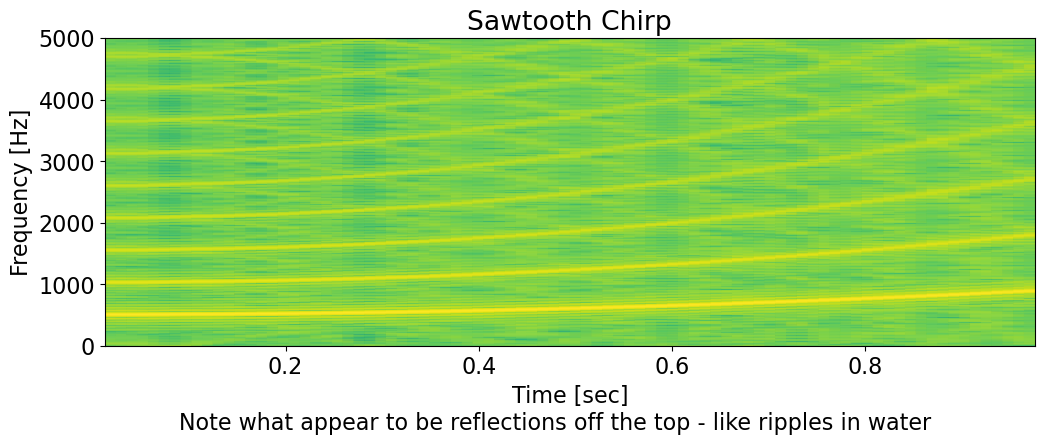

In [14]:
ffs2, tts2, Sxxs2 = signal.spectrogram(ys2, fs, detrend=False, nfft = NFFT)

fig = plt.figure(figsize=(12,4))
plt.pcolormesh(tts2, ffs2, np.log10(Sxxs2), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Sawtooth Chirp')
plt.ylim([0, fs/2])
caption('Note what appear to be reflections off the top - like ripples in water')
plt.show()